## Google Play Store apps and reviews
<p>The notebook intends to analyse over ten thousand apps from Google Play Store apps to devise pricing strategies.</p>
<p>The data consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app. <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">The ranking is based on the contribution to the sentiment analysis</a>. The text in each review has been pre-processed and attributed with three new features: <br> <strong>Sentiment</strong> (Positive, Negative or Neutral), <strong>Sentiment Polarity</strong> and <strong>Sentiment Subjectivity</strong>.</li>
</ul>
    
<p><strong>Structure</strong>
<ol>
<li>Import Packages</li>
<li>Dataset Information</li>
<li>Data Cleaning</li>    
<li>Exploring app categories</li> 
<li>Distribution of app ratings</li> 
<li>Size and price of an app</li> 
<li>Relation between app category and app price</li> 
<li>Filter out "junk" apps</li> 
<li>Popularity of paid apps vs free apps</li> 
<li>Sentiment analysis of user reviews</li> </ol></p>
<p><strong> Features to work wiht</strong>:
<br> <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code> 
    
<p><strong>Key Findings</strong>:
<ol>
<li>Categories about <strong> personal growth and management</strong> tend to have higher rates. 
<ul>
    <li>Top 5 Ratings: <em>Event (4.4), Education, Art_and_Design, Books_and_Reference, Personalization</em></ul></li>
<li>Large Market Share and large installments does not help with app ratings 
    <ul>
 <li> <em>Tools</em> holds the third largest market share and the third largest installment times, but is rated as the third from the bottom.</ul></li>
<li>The downloading difference between paid/free apps are, unexpectedly, <strong> relatively low</strong></li>
<li>From the sentiment analysis, it shows that free apps receive lots of negative comments, which is within expectations</li>
</ol>

## 0. Import Packages

In [12]:
import pandas as pd
from scipy.stats import spearmanr
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Dataset Information

In [13]:
# Load datasets
apps = pd.read_csv("datasets/apps.csv")

# Check duplicates
print('Total number of duplicated items in the dataset = ', sum(apps.duplicated()))

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Print a summary of apps dataframe
# Decide which columns to work 
apps.info()

Total number of duplicated items in the dataset =  0
Total number of apps in the dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [14]:
# Have a look at a random sample of 5 rows
apps.sample(5)

Unnamed: 0                               App        Category  Rating  \
1918        2440                      Doctors Care         MEDICAL     NaN   
2879        3636  Weather â€“Simple weather forecast         WEATHER     4.4   
973         1197                         Starbucks  FOOD_AND_DRINK     4.5   
8406        9533               Exiled Kingdoms RPG          FAMILY     4.6   
5348        6356           BURGER KINGÂ® MOBILE APP       LIFESTYLE     3.8   

      Reviews  Size     Installs  Type Price Content Rating        Genres  \
1918        0  25.0          10+  Free     0       Everyone       Medical   
2879    40606  15.0  10,000,000+  Free     0       Everyone       Weather   
973    455377  35.0  10,000,000+  Free     0       Everyone  Food & Drink   
8406    49210  99.0   1,000,000+  Free     0   Everyone 10+  Role Playing   
5348    19221  13.0   5,000,000+  Free     0       Everyone     Lifestyle   

        Last Updated               Current Ver         Android Ver  
1918   July 24, 2018             2.0.0 (35717)          4.4 and up  
2879  August 5, 2018  v7.0.02.3.0516.1_06_0713          5.0 and up  
973   August 1, 2018                    4.11.1          4.4 and up  
8406    July 5, 2018                  1.2.1107          4.1 and up  
5348    May 24, 2018        Varies with device  Varies with device

## 2. Cleaning Data

<p> <strong>Features to work wiht</strong>:
<br> <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code></p>
    
<p> <strong>Problem</strong>:
<br> <code>Installs</code> and <code>Price</code> columns are of type <code>object</code> and not <code>int64</code> or <code>float64</code> as we would expect.</p>
<p><strong>Solution</strong>:
<br> The wrong type maybe caused by <strong> special characters</strong> in <code>Installs</code> and <code>Price</code> columns. As seen from the sample, there are <code> (, + $) </code> characters in columns. Thus, we need to clean the special characters </p>

In [15]:
# Check special characters
print(apps.Installs.unique())
print(apps.Price.unique())

# List of characters to remove
chars_to_remove = ["+",",","$"]
# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
    # Convert col to float data type
    apps[col] = apps[col].astype(float)

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


In [16]:
# Check the clean dataset
apps.head(3)

Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite â€“ FREE Live Cool Themes, Hide ...   

         Category  Rating  Reviews  Size   Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159  19.0    10000.0  Free    0.0   
1  ART_AND_DESIGN     3.9      967  14.0   500000.0  Free    0.0   
2  ART_AND_DESIGN     4.7    87510   8.7  5000000.0  Free    0.0   

  Content Rating                     Genres      Last Updated Current Ver  \
0       Everyone               Art & Design   January 7, 2018       1.0.0   
1       Everyone  Art & Design;Pretend Play  January 15, 2018       2.0.0   
2       Everyone               Art & Design    August 1, 2018       1.2.4   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up

## 3. Exploring app categories
<p><strong> Leading questions</strong>:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

<p><strong>Key Findings:</strong></p>
<ul>
<li> <code>33</code> unique app categories in the dataset</li>
<li> Market
<ul>
<li><em>Top 5: Family (1832), Game, Tools, Business, <span style="color: red">Medical</span></em></li>  
<li>Last 5: <em>Beauty, Parenting, Comic, Art and Design, Events</em> </li> 
    </ul></li>
<li> Installed    
<ul>
<li>Top 5: <em>Game(1.387892e+10), Communication, Tools, Productivity, and Social</em> </li> 
<li>Last 5: <em>Events, Beauty, Parenting, <span style="color: red">Medical</span>, Comics</em> </li> 
    </ul>   
    

<li><em><span style="color: red">Medical</span></em> holds the fifth biggest markets on Google Play, but ranks as fourth from the bottom in installments.</li> 
 
    

In [17]:
# Print the total number of unique categories
num_categories = apps["Category"].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. Sort in descending order depending on number of apps in each category
num_apps_in_category = apps["Category"].value_counts().sort_values(ascending=False)
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


In [18]:
# Count the number of installed apps in each 'Category'. Sort in descending order
num_apps_installed=apps.groupby("Category").agg({"Installs":"sum" }).sort_values(by="Installs",ascending=False)

data = [go.Bar(
        x = num_apps_installed.index, # index = category name
        y = num_apps_installed["Installs"], # value = count
)]

plotly.offline.iplot(data)
num_apps_installed["Installs"].head(10)

Category
GAME                  1.387892e+10
COMMUNICATION         1.103828e+10
TOOLS                 8.001772e+09
PRODUCTIVITY          5.793091e+09
SOCIAL                5.487868e+09
PHOTOGRAPHY           4.649148e+09
FAMILY                4.427942e+09
VIDEO_PLAYERS         3.926903e+09
TRAVEL_AND_LOCAL      2.894887e+09
NEWS_AND_MAGAZINES    2.369218e+09
Name: Installs, dtype: float64

## 4. Distribution of app ratings
<p>After finding out the market share for each category, it is important to see how these apps perform on average from their ratings.</p>

<p><strong>Key Findings:</strong></p>
<ul>
<li> the average rating of all app categories is <code>4.17</code></li>
<li> The histogram plot is<strong> left skewed</strong> indicates that
<ul> 
<li>most of the apps are highly rated</li> 
<li>only a few are lowly rated.</li> 
</ul>
</li>
    <li>Top 5:Rating <em>Event (4.4), Education, <span style="color: red">Art_and_Design</span>, Books_and_Reference, Personalization</em></li>
    <ul>    
<li> The highly rated apps are mostly about Personal Development</li>
<li> <em><span style="color: red">Art_and_Design</span></em> holds the second smallest market share, but holds the top three rates.</li></ul>
    <li>Last 5 Rating: <em>Dating (4.0), Maps_and_Navigation, <span style="color: red">Tools</span>, Video_Players, Travel_and_Local</em></li>
    
<ul>
 <li> <em><span style="color: red">Tools</span></em> holds the third largest market share and the installments, but is rated as the third from the bottom.</ul></li>
</ul>

In [19]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({"data":data,"layout":layout})

Average app rating =  4.173243045387998


In [20]:
category_average_score=apps.groupby("Category")["Rating"].mean().sort_values(ascending=False)
data = [go.Line(
        x = category_average_score.index,
        y= category_average_score.values)]

# Horizontal dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': "EVENTS",
              'y0': avg_app_rating,
              'x1': "DATING",
              'y1': avg_app_rating,
              'line': { 'dash': 'dashdot'}
          }]
          }
plotly.offline.iplot({"data":data,"layout":layout})
category_average_score.head(5)

/opt/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Category
EVENTS                 4.435556
EDUCATION              4.364407
ART_AND_DESIGN         4.357377
BOOKS_AND_REFERENCE    4.344970
PERSONALIZATION        4.332215
Name: Rating, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



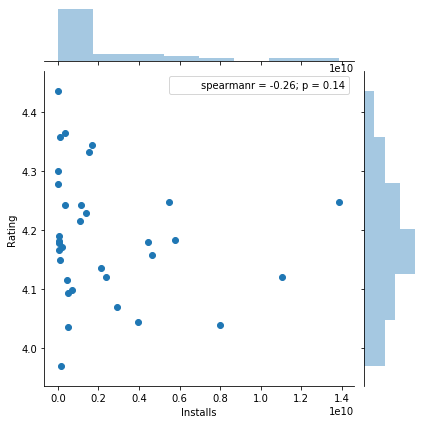

In [21]:
# Check the realtion bewteen Installs and Rating. High installments doesnÂ´t necessarily mean high rates.
category_info=apps.groupby("Category").agg({"Rating":"mean","Installs":"sum" })
sns.jointplot(x="Installs",y="Rating",data=category_info, stat_func=spearmanr)

## 5. Size and price of an app
<p> To better understand customersÂ´ app downloading behaviors, I narrowed down the variants to <code>Size</code> and <code>Price</code> of an app. 

<strong>Hypothesis:</strong>
<br> People may prefer to download free/light apps than expensive/heavy apps.    
 
<p><strong>Leading Question:</strong>
<br>How size and price of apps affect their popularity?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>

<p><strong>Key Findings:</strong>
<ul>
<li> the majority of top rated apps (rating >4) from <code>2MB</code> to <code>20MB</code></li>
<li> most of apps price themselves <strong> under \$10</strong> </li>
</ul>

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



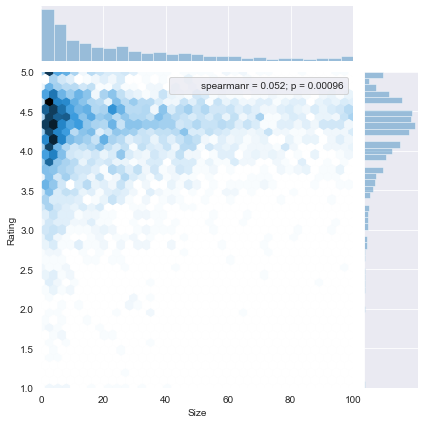

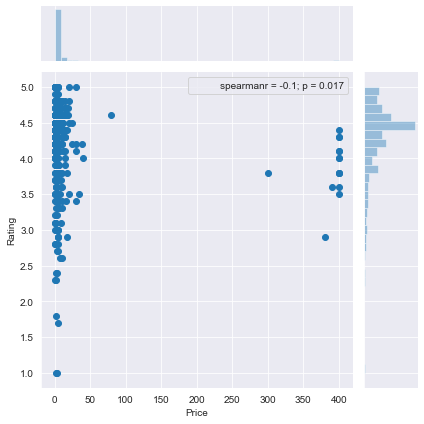

In [22]:
sns.set_style("darkgrid")

# Select rows where both 'Rating' and 'Size' values are not null
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull())&(~apps["Size"].isnull())]

# Find out the categories that with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"], kind = 'hex',stat_func=spearmanr)

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"]=="Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"],stat_func=spearmanr)

## 6. Relation between app category and app price
<p>After understand the influences of size and price to apps, how to determine the price of apps to make ends meet?</p>

<p><strong>Leading Question:</strong>
<br>How to make the right pricing stragety for the apps per category?</p>
<ul> 
<li>Determine the relation between app category and app price </li>
<li>Balance between free/paid apps and the retention of usersÂ´ interests </li>
</ul>
    
<p><strong>Key Findings:</strong>
<ul>
<li> <em>Medical and Family</em> apps are the most expensive
<ul><li>Some medical apps extend even up to<strong> \$80</strong></li> </ul>

<li>All game apps are reasonably priced below <strong> \$20.</strong> </li>
 <li>There are some "junk" apps in the data. Their price are over <strong> \$200.</strong> 
<ul>
<li>The junk apps are from: <strong> <em> Finance, Lifestyle, Medical (1 app) and Family</em></strong> </ul> </li>
</ul>    


Text(0.5, 1.0, 'App pricing trend across categories')

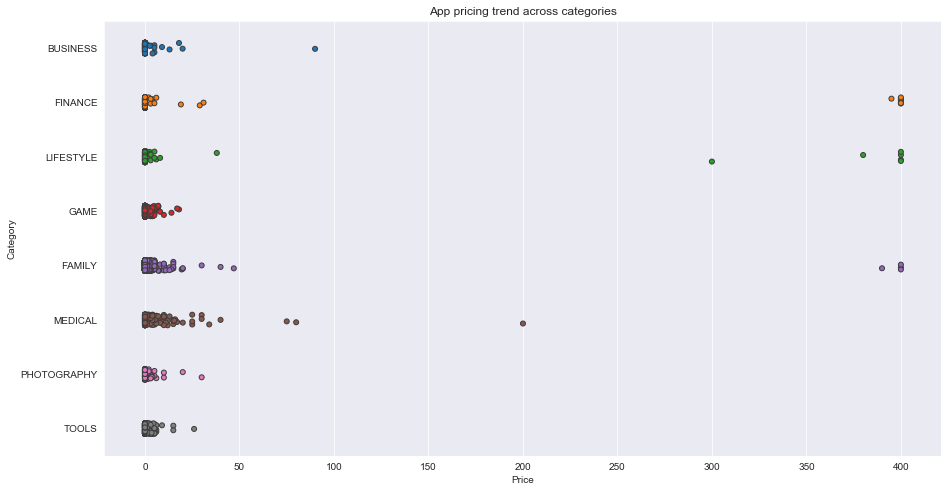

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select the popular app categories from 3.Exploring app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

In [24]:
# Apps whose Price is or greater than 200
apps_above_200 = apps[apps["Price"]>=200]
apps_above_200[['Category', 'App', 'Price']]

Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         ðŸ’Ž I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8577    MEDICAL                       EP Cook Book  200.00
8763    FINANCE                        Eu Sou Rico  394.99
8780  LIFESTYLE  I'm Rich/Eu sou Rico/Ø£Ù†Ø§ ØºÙ†ÙŠ/æˆ‘å¾ˆæœ‰éŒ¢  399.99

## 7. Filter out "junk" apps
<p>Junk apps
<ul>
<li>really expensive</li> 
<li>for developers to test their skills</li>
<li>malicious apps for accidental clicking</li>
</ul>
</p>
<p><strong>Solutions</strong></p>
<ul>
<li> filter out junk apps</li> 
<li> redo visualization</li> 
</ul>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

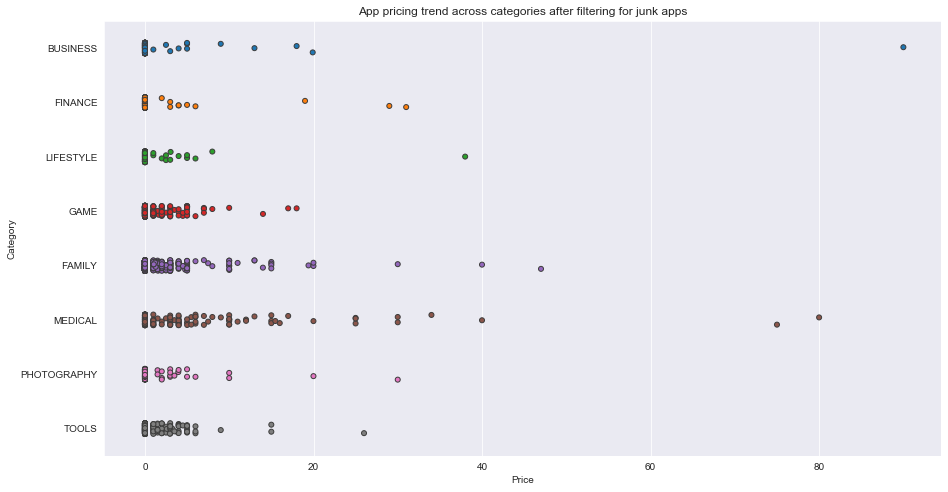

In [25]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the real apps (apps_under_100)
ax = sns.stripplot(x = "Price", y ="Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Popularity of paid apps vs free apps
<p>There are five types of pricing strategies: free, freemium, paid, paymium, and subscription. After understanding the relation between categories and price of apps, I decide to focus on <strong>free and paid apps.</strong></p>
<p> Characteristics of <strong>free apps</strong>:
<ul>
<li>Free to download.</li>
<li>Main source of income from advertisements.</li>
<li>Often created by companies that have other products and the free app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>

<p>Characteristics of<strong> paid apps</strong>:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
</p>

<p><strong>Leading Question</strong>:
<ul>
<li>Are paid apps installed as much as free apps?</li>
</ul></p>  

<p><strong>Key Findings</strong>:
<ul>
<li>The downloading difference between paid/free apps are, unexpectedly, <strong> relatively low</strong></li>
</ul></p>  

In [26]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Sentiment analysis of user reviews
<p>App User reviews data can be analyzed to identify customersÂ´ mood: positive, negative or neutral, e.g:
<ul> 
<li>Positive:'amazing', 'friendly', 'good', 'great', and 'love'.</li>
<li>Negative: 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</li></ul>   
</p>

<p><strong>Leading Question</strong>:
<ul>
<li>Do free apps receive more negative reviews?</li>
</ul></p>  

<p><strong>Key Findings</strong>:
<ul>
<li>Free apps receive more negative comments 
<ul>    
<li>There are lots of outliers on the negative y-axis in the free apps</ul></li>
    <li> Paid apps have better quality<ul>
    <li>The median polarity score for paid apps is a little higher than free apps</ul></li>
</ul></p>  

In [27]:
# Load user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

merged_df.head(3)

Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type  Price Content Rating                     Genres  \
0  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
1  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
2  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  \
0  January 15, 2018       2.0.0  4.0.3 and up   
1  January 15, 2018       2.0.0  4.0.3 and up   
2  January 15, 2018       2.0.0  4.0.3 and up   

                                              Review Sentiment  \
0  A kid's excessive ads. The types ads allowed a...  Negative   
1                                         It bad >:(  Negative   
2                                               like   Neutral   

   Sentiment_Polarity  Sentiment_Subjectivity  
0              -0.250                1.000000  
1              -0.725                0.833333  
2               0.000                0.000000

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

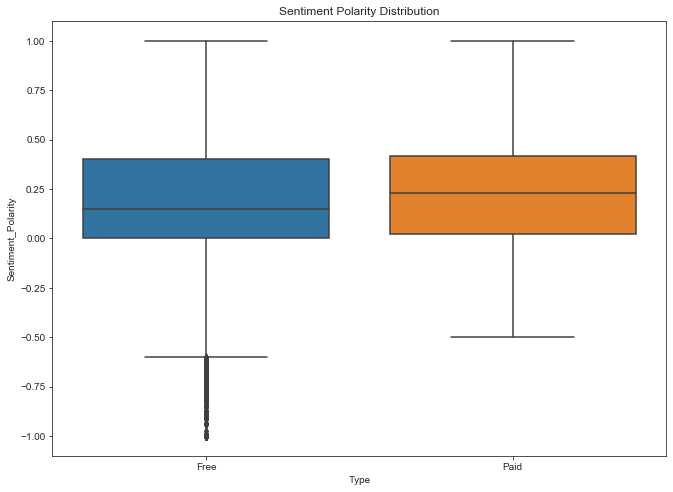

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')